# Normalized Cut

## Setup

In [1]:
from src.utilities.dataset import load_data
from src.models.clustering_model import NormalizedCutEvaluation
from src.models.clustering import plot_cluster_frequencies, plot_cluster_composition, plot_reconstructed_images, plot_model_means

## Load Data


In [2]:
data = load_data(reduced=True)
data

Loading /Users/a/GitHub/clustering/src/data/red_x_pixels.csv
Loading /Users/a/GitHub/clustering/src/data/red_y_labels.csv


## Tuning

In [3]:
ncut_evaluation = NormalizedCutEvaluation(
    data=data,
    n_components=[2, 5, 10, 15, 25, 50, 100, 150, 200],
    hyperparam_vals=[x for x in range(5, 16)]
)

In [4]:
ncut_evaluation.load_results()

Loading /Users/a/GitHub/clustering/src/results/NormalizedCut_n_clusters_result.json
Loading /Users/a/GitHub/clustering/src/results/NormalizedCut_n_clusters_result_bestmodels.json
Loading /Users/a/GitHub/clustering/src/results/NormalizedCut_n_clusters_bestmodel.pkl


In [ ]:
%%time
# ncut_evaluation.evaluate()

## Results

In [5]:
ncut_evaluation.results

{'2': {'5': {'score': 0.7312032900309205,
   'n_clusters': 5,
   'time': 147.474915485},
  '6': {'score': 0.7484092026981519,
   'n_clusters': 6,
   'time': 106.36627306999992},
  '7': {'score': 0.7658048329982754,
   'n_clusters': 7,
   'time': 106.82611945600001},
  '8': {'score': 0.7710773218495198,
   'n_clusters': 8,
   'time': 108.7861824690001},
  '9': {'score': 0.7999086669455981,
   'n_clusters': 9,
   'time': 112.73191979299986},
  '10': {'score': 0.8102705499372405,
   'n_clusters': 10,
   'time': 115.25756839499991},
  '11': {'score': 0.8103065933280948,
   'n_clusters': 11,
   'time': 2199.1691114269997},
  '12': {'score': 0.8103191758595002,
   'n_clusters': 12,
   'time': 2940.850295026},
  '13': {'score': 0.8102145969610074,
   'n_clusters': 13,
   'time': 3736.3082354849994},
  '14': {'score': 0.8101152327207045,
   'n_clusters': 14,
   'time': 2163.7971270279995},
  '15': {'score': 0.8099706203504332,
   'n_clusters': 15,
   'time': 2255.6865998369994}},
 '5': {'5': {

In [6]:
ncut_evaluation.results_bestmodels

{'2': {'n_clusters': 12, 'score': 0.8103191758595002, 'time': 2940.850295026},
 '5': {'n_clusters': 15,
  'score': 0.8682691824926271,
  'time': 52.13599332300146},
 '10': {'n_clusters': 15,
  'score': 0.8900836896513016,
  'time': 61.447460942999896},
 '15': {'n_clusters': 15,
  'score': 0.9010313695876236,
  'time': 54.89419081300002},
 '25': {'n_clusters': 15,
  'score': 0.8995765717959446,
  'time': 57.930971486999624},
 '50': {'n_clusters': 15,
  'score': 0.8984739114018349,
  'time': 51.83284929000001},
 '100': {'n_clusters': 15,
  'score': 0.8925024134376945,
  'time': 59.5688896060019},
 '150': {'n_clusters': 15,
  'score': 0.8774303368607962,
  'time': 52.390386186001706},
 '200': {'n_clusters': 15,
  'score': 0.8512275366607819,
  'time': 56.069755483000336}}

In [7]:
ncut_evaluation.best_model

{'model': SpectralClustering(n_clusters=15, n_jobs=-1, random_state=28),
 'n_components': 15,
 'n_clusters': 15,
 'score': 0.9010313695876236,
 'time': 54.89419081300002}

## Plots: Model Tuning

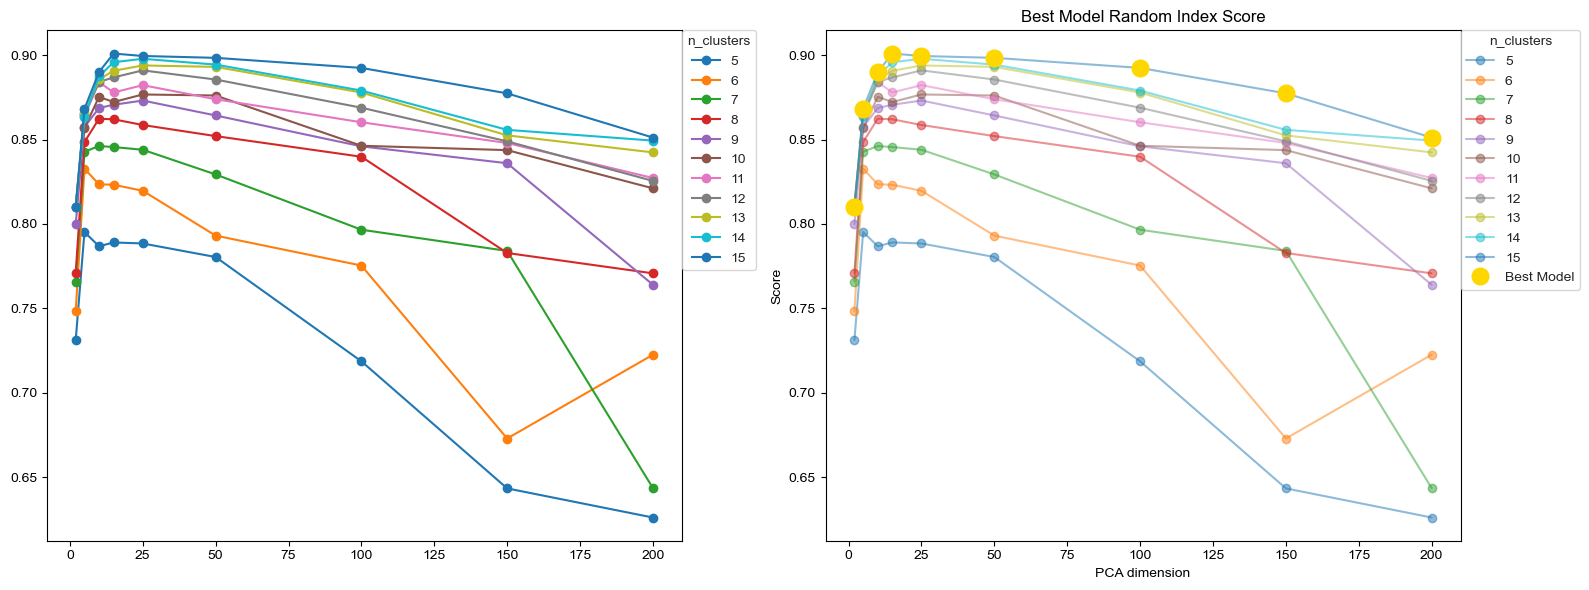

In [8]:
ncut_evaluation.plot_score_with_highlight(save=True)

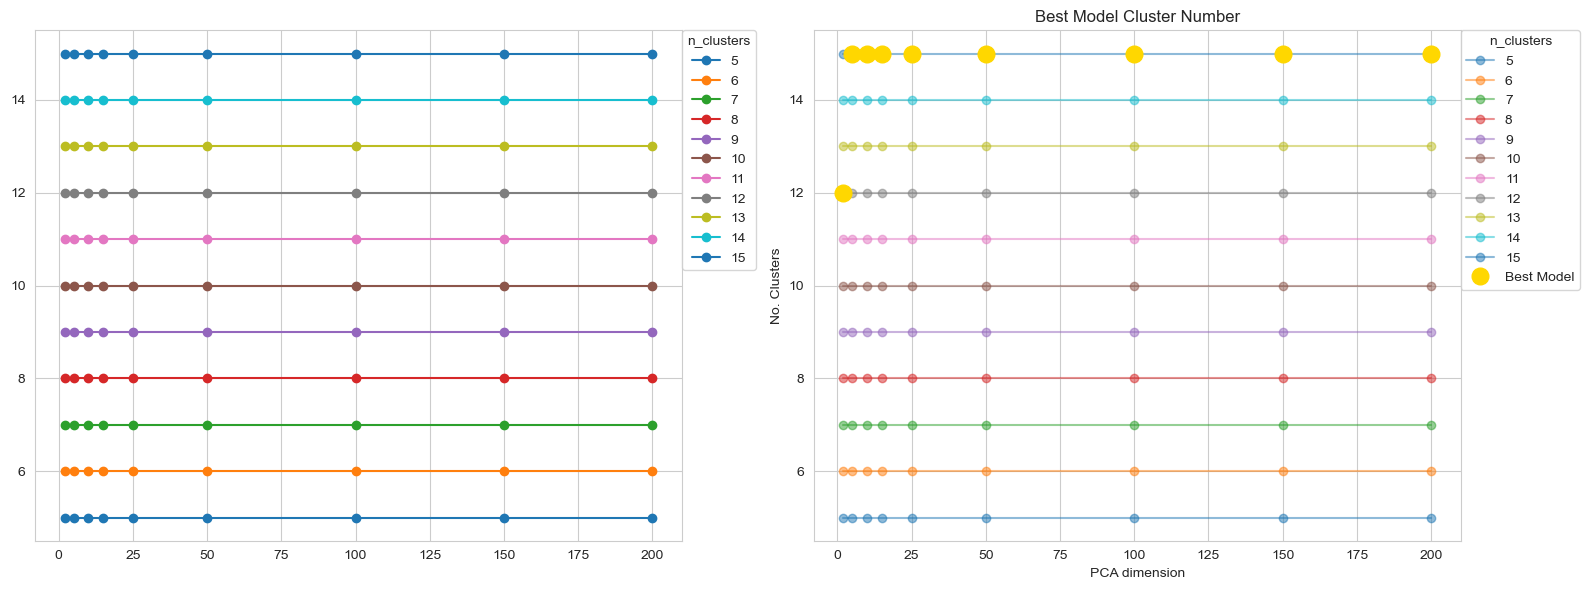

In [9]:
ncut_evaluation.plot_n_clusters_with_highlight(save=True)

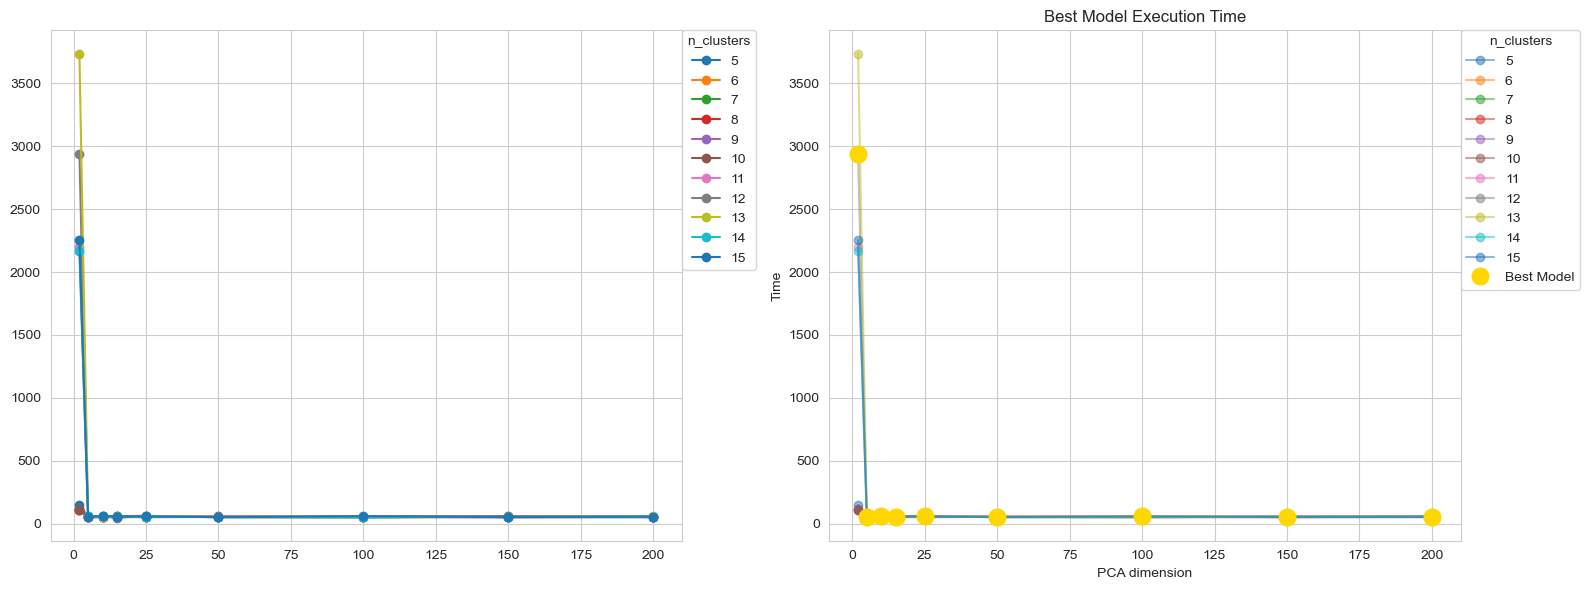

In [10]:
ncut_evaluation.plot_time_with_highlight(save=True)

## Plots: Best Model

In [11]:
best = ncut_evaluation.best_model

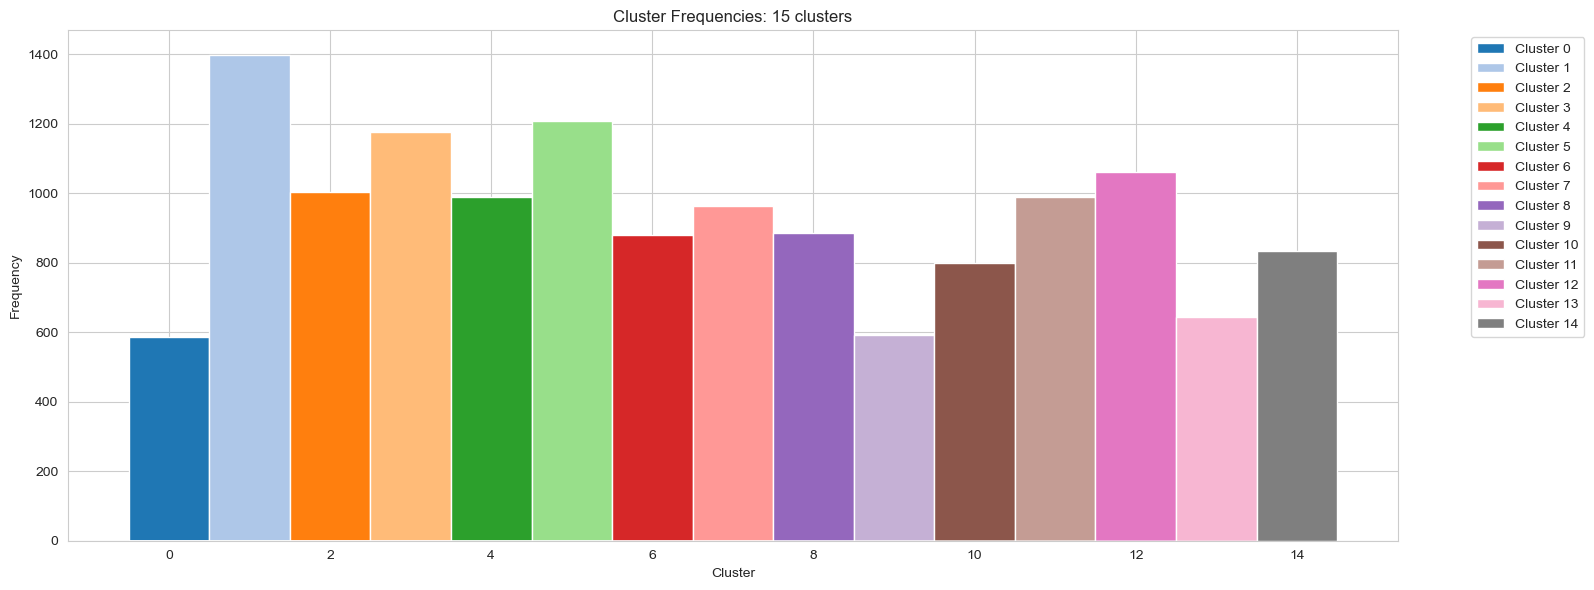

In [12]:
plot_cluster_frequencies(data=data, model_name=ncut_evaluation.model_name, best_model_info=best, save=True)

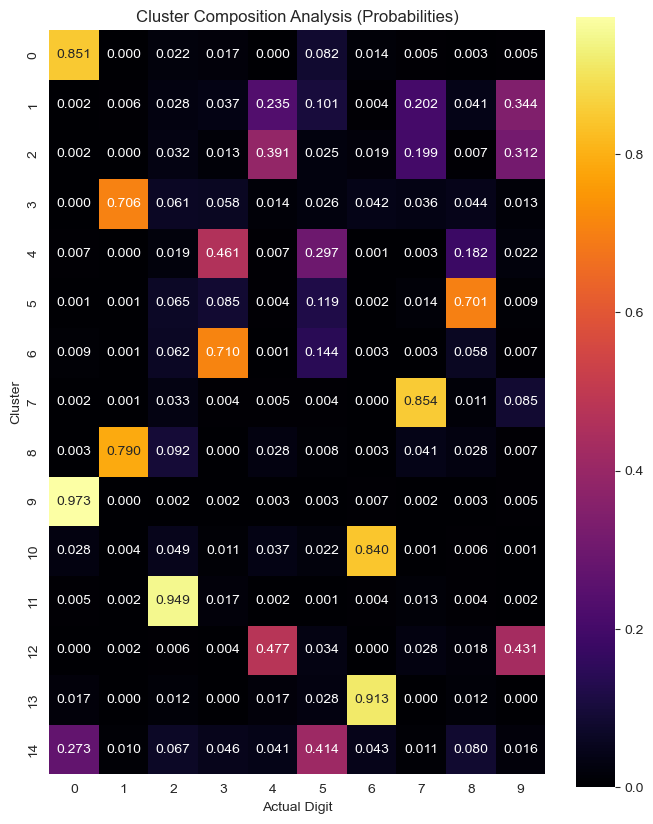

Percentage of clusters focused on each digit:
For digit 0: 13.333%
For digit 1: 13.333%
For digit 2: 6.667%
For digit 3: 6.667%
For digit 4: 0.000%
For digit 5: 0.000%
For digit 6: 13.333%
For digit 7: 6.667%
For digit 8: 6.667%
For digit 9: 0.000%
Underperforming Clusters (distributed across multiple digits): 33.333%


In [13]:
plot_cluster_composition(data=data, model_name=ncut_evaluation.model_name, best_model_info=best, save=True)

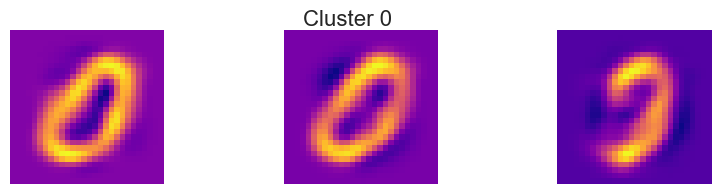

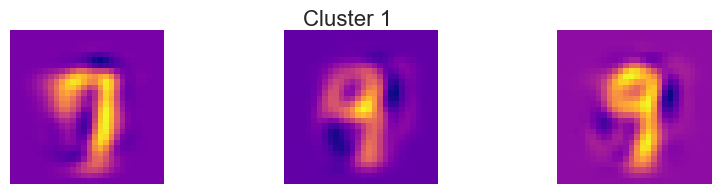

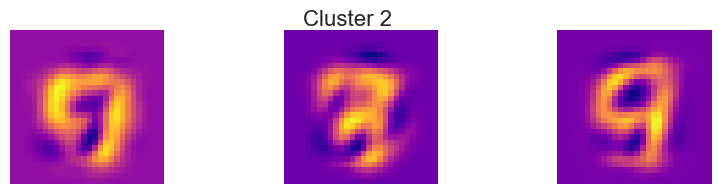

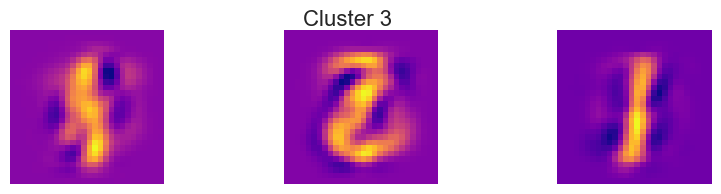

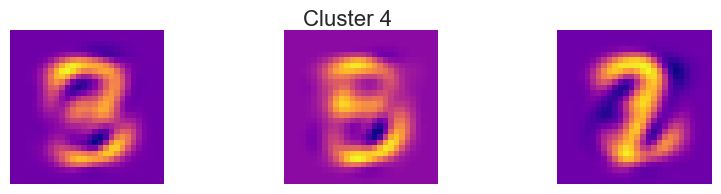

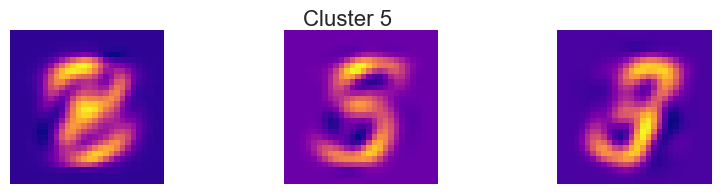

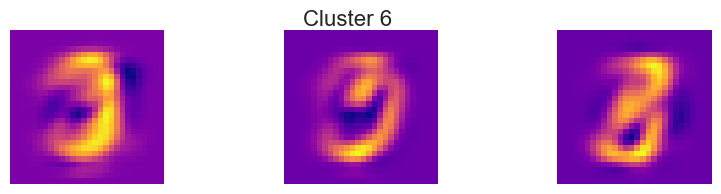

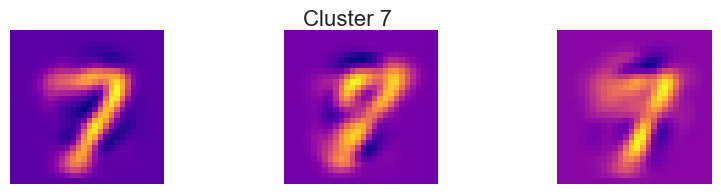

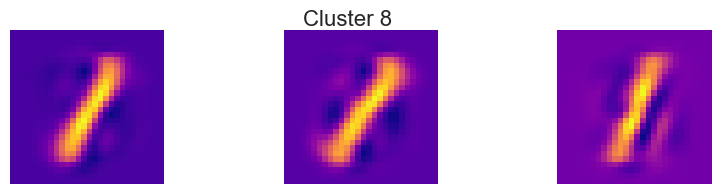

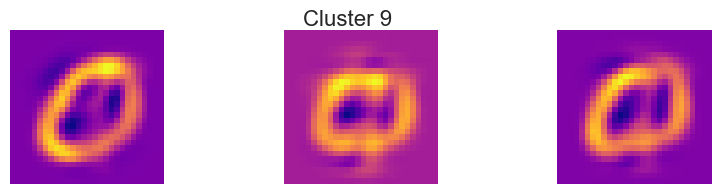

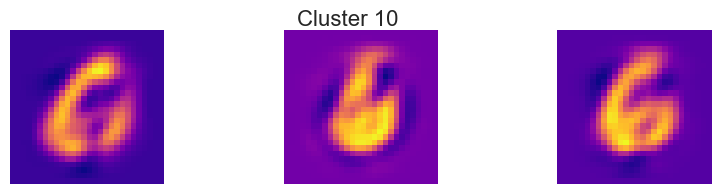

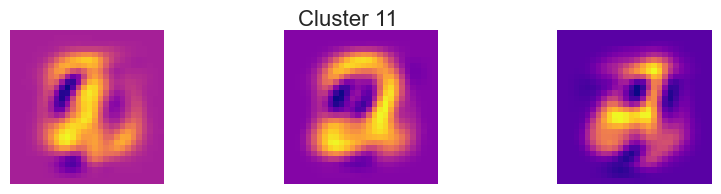

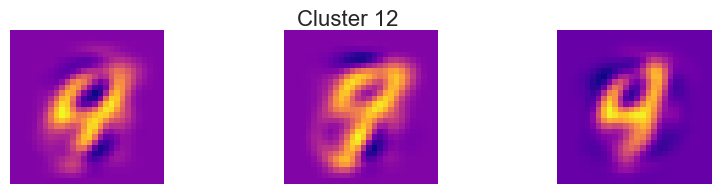

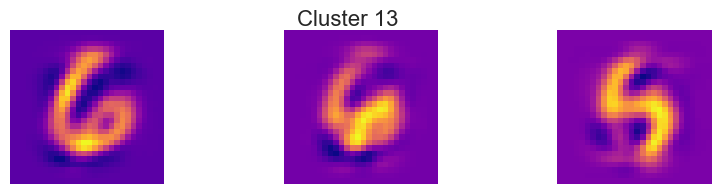

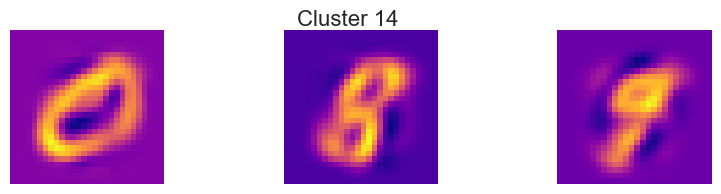

In [14]:
plot_reconstructed_images(data=data, model_name=ncut_evaluation.model_name, best_model_info=best)

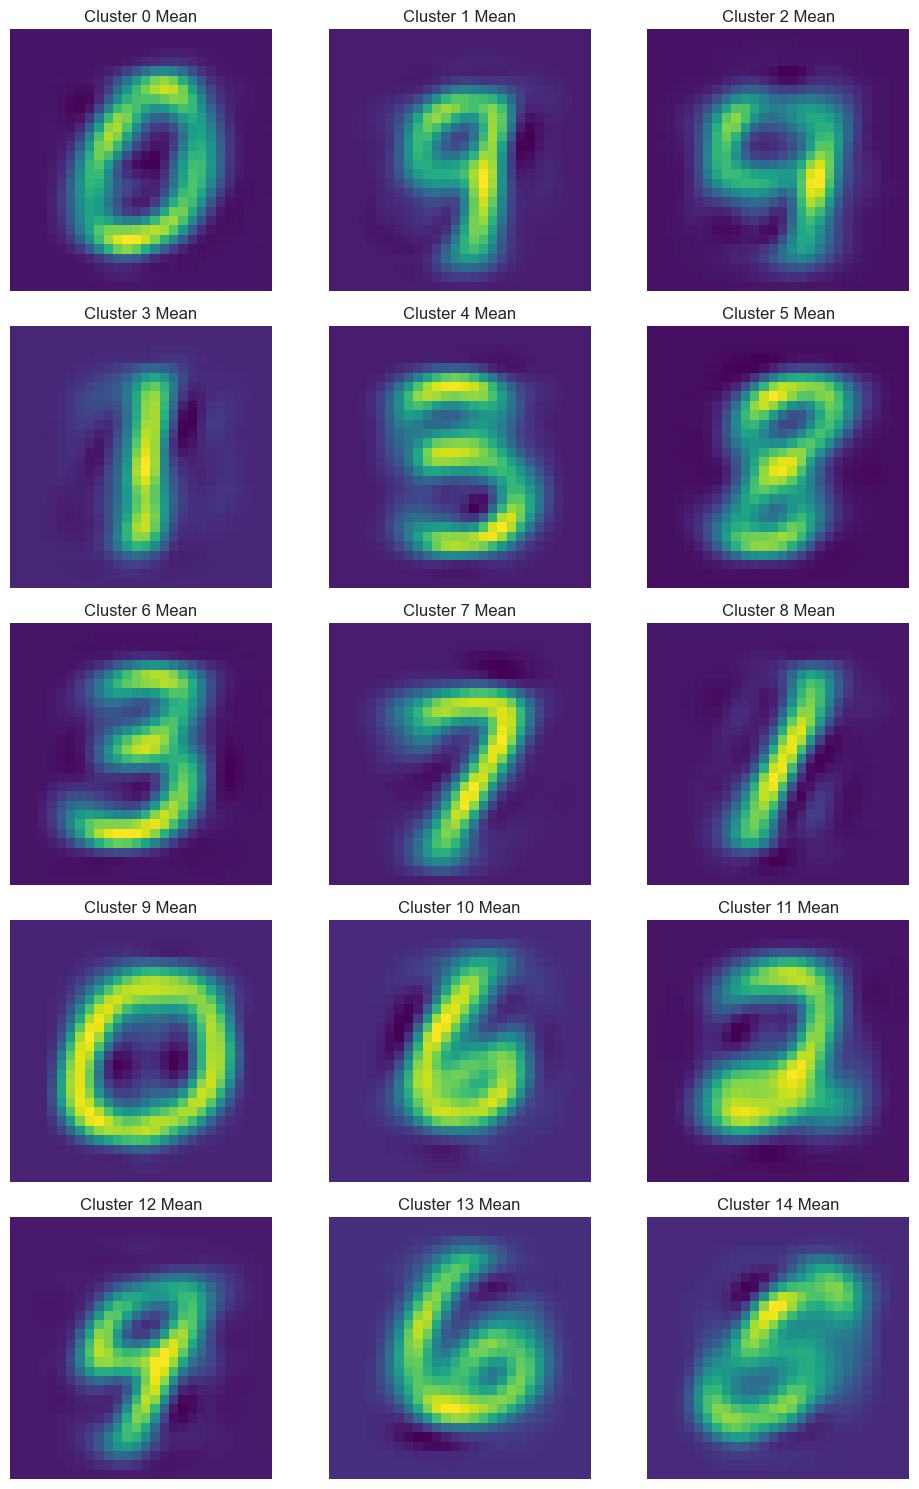

In [15]:
plot_model_means(data=data, model_name=ncut_evaluation.model_name, best_model_info=best, save=True)